<a href="https://colab.research.google.com/github/JuanSpecht/ML2021/blob/main/TP1/ML_TP1_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importo dependencias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#@title Matrices random

"""
Las matrices a_values_save y b_values_save fueron obtenidas con el siguiente
código y guardadas para poder reproducir los resultados (a_values y b_values)
"""

# n = 50
# a_mean = 5; a_sd = 3
# b_mean = 3; b_sd = 2
# a_values = np.random.normal(a_mean, a_sd, n)
# b_values = np.random.normal(b_mean, b_sd, n)

a_values_save = np.array([ 5.54722192,  6.01914278,  2.63644783,  1.21249026,  7.23695599,
       -0.13062137,  1.0511497 ,  4.4304722 ,  0.52125764, 13.87915317,
       -0.08506362,  7.78511821,  4.84962252,  8.50652237,  0.87100419,
        5.59101693, -1.92326066,  5.95582452,  6.16902697,  6.12223226,
        4.18921976,  7.20717792,  4.54684446,  2.05977301,  8.52096216,
        5.86268138,  1.21225086,  4.97076301, 10.07637773,  8.34291157,
        7.32625403,  9.71293009,  3.06670411,  6.15940604,  8.5022583 ,
        1.11149788,  2.40476612,  7.13343565,  8.29428991,  1.91882843,
        1.02692763,  4.40391357,  6.84499431,  4.32562178,  6.77413617,
        4.40936437,  6.66544494,  5.05496509,  7.66205534, -0.50852311])

b_values_save = np.array([ 1.50728284,  3.14839677,  0.93562693,  3.32243525,  4.59938306,
        2.50138268,  2.13359484, -0.03514003,  2.87258075,  1.93975318,
        4.91693512,  1.37488655,  5.24201406,  0.39093877,  5.84097171,
        3.20140679,  6.27740504,  4.79903833,  1.46434135,  4.12344912,
        2.92876488, -0.47965053,  3.85235342,  4.19047726,  2.73076655,
        4.67968846,  2.21381489,  3.61053164,  6.60799595,  1.0733093 ,
        6.01108246,  2.232161  ,  4.21173876,  3.41467648,  1.41125566,
        5.78928516,  0.89880823,  4.59222966,  5.57490813,  7.00424629,
        4.02048782,  5.36251629,  0.75513644,  2.82988601,  3.75809418,
        1.71706486,  3.04425699,  5.51590905, -0.49625778,  4.31741755])

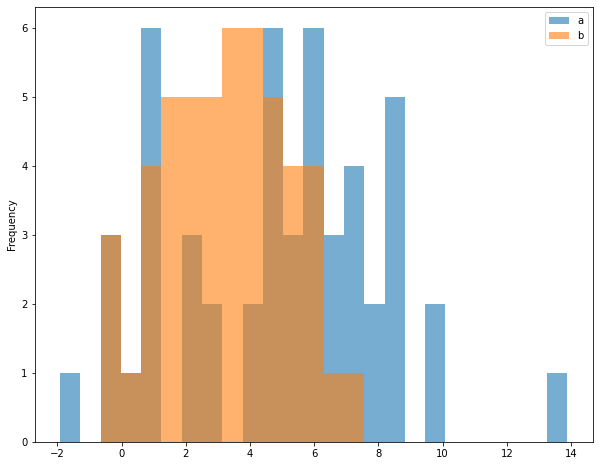

In [ ]:
# genero el dataset y grafico un histograma para las categorías "a" y "b"

a_values = a_values_save
b_values = b_values_save

a_letters = np.full((n,1), 'a')
b_letters = np.full((n,1), 'b')

df = pd.DataFrame(np.concatenate([a_values, b_values]), columns=['value'])
df['tag'] = np.concatenate([a_letters,b_letters])

df_plot = pd.DataFrame(
{"a" : a_values,
"b" : b_values})
df_plot.plot.hist(bins=25, alpha=0.6, figsize=(10,8))

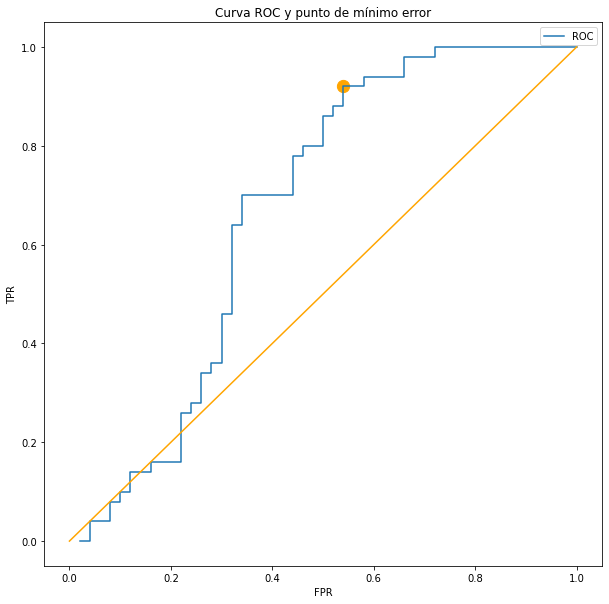

El mínimo error viene dado por un clasificador con un unmbral de: 5.84097171


In [ ]:
# obtengo la curva ROC

df1 = df.copy()

df1['category'] = (np.concatenate([a_letters, b_letters]) == 'b')
df1 = df1.sort_values('value')
df1 = df1.set_index(pd.Series(range(df1.shape[0])))

b_total = df1.category.sum()
a_total = df1.shape[0] - b_total

df1['b_cumulative'] = df1.category.cumsum()
df1['TPR'] = df1.category.cumsum()/b_total
df1['a_cumulative'] = range(1,1+df1.shape[0]) - df1['b_cumulative']
df1['FPR'] = df1['a_cumulative']/a_total

# para hallar un clasificador con el mínimo error obtengo el punto
# o los puntos más alejados de la diagonal 

TPR = df1[['TPR']].to_numpy()
FPR = df1[['FPR']].to_numpy()
dist = abs((FPR[:] - TPR[:]) / np.sqrt(2))
max_dist_idx = np.argwhere(dist == np.amax(dist))

# grafico la curva ROC y el punto o los puntos obtenidos

df1_array = df1[['FPR', 'TPR']].to_numpy()

ax = df1.plot(x='FPR', y='TPR', figsize=(10,10), label='ROC', title='Curva ROC y punto de mínimo error')
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
plt.plot(df1['TPR'],df1['TPR'], c='orange')
plt.scatter(df1_array[max_dist_idx[:,0],0],df1_array[max_dist_idx[:,0],1], c='orange', s=150)
plt.legend()
plt.show()

print ('El mínimo error viene dado por un clasificador con un unmbral de: ' + np.str(df1.value[max_dist_idx[0,0]]))

Ahora obtengo algunos parámetros de calidad como función del umbral. El máximo de cada parámetro indica el clasificador más apropiado según lo que se quiera optimizar en el problema

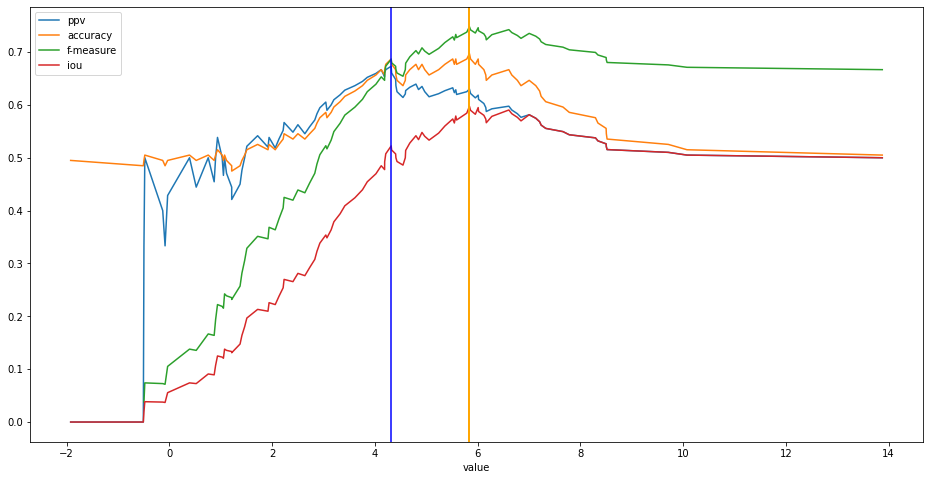

máximo de precisión: 4.31741755, máximo de exactitud: 5.84097171


In [ ]:
# Obtengo los parámetros de calidad para el clasificador

df2 = df1.copy()

df2['TP'] = df2['b_cumulative']
df2['FP'] = df2['a_cumulative']
df2['TN'] = a_total - df2['FP']
df2['FN'] = b_total - df2['TP']

df2['ppv'] = df2['TP']/ (df2['TP'] + df2['FP']) # positive predictive value
df2['f-measure'] = 2* df2['ppv'] * df2['TPR'] / (df2['ppv'] + df2['TPR'])
df2['iou'] = df2['TP']/ (df2['TP'] + df2['FP'] + df2['FN'])
df2['accuracy'] = ( df2['TP'] + df2['TN'] ) / (df2.index[-1])

# Hallo los valores máximos para los parámetros

max_ppv = df2['value'][df2["ppv"].idxmax()]
max_accuracy = df2['value'][df2["accuracy"].idxmax()]
max_f_measure = df2['value'][df2["f-measure"].idxmax()]
max_iou = df2['value'][df2["iou"].idxmax()]

df2.plot(x='value', y=['ppv', 'accuracy', 'f-measure', 'iou'], figsize=(16,8))
plt.axvline(x=max_ppv, c='blue', label='máxima precisión')
plt.axvline(x=max_accuracy, c='orange', label='máxima exactitud')
plt.axvline(x=max_f_measure, c='orange', label='máxima f-measure')
plt.axvline(x=max_iou, c='orange', label='máxima IoU')

plt.show()

print('máximo de precisión: ' + np.str(max_ppv) +
      ', máximo de exactitud: ' + np.str(max_accuracy))

La línea vertical azul indica el máximo en la precisión, y la línea 
naranja el máximo de los otros tres indicadores.
Se puede ver que todos los parámetros tienen su máximo en 5.84097171, excepto la precisión (ppv), que tiene el máximo en 4.31741755.
Sin embargo, adoptando el valor 4.31741755 para el umbral se obtiene una menor exactitud (se obtienen valores altos de FP y FN)

# Alejo las medias de las dos poblaciones:

In [1]:
# desplazo la población "a" en 3 hacia la derecha

a_values = a_values_save + 3
b_values = b_values_save

NameError: ignored

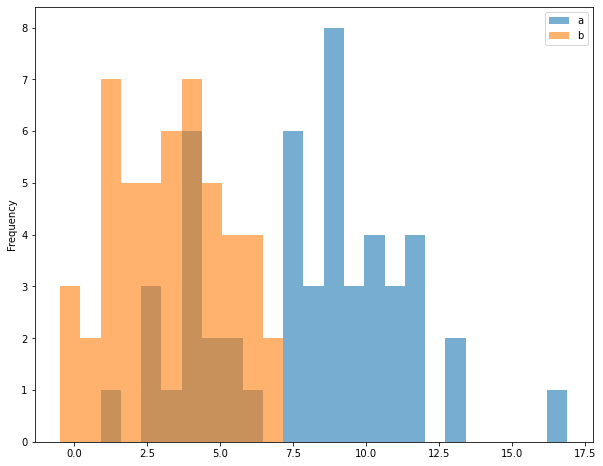

In [ ]:
#@title Genero el dataset y lo grafico en un histograma

a_letters = np.full((n,1), 'a')
b_letters = np.full((n,1), 'b')

df = pd.DataFrame(np.concatenate([a_values, b_values]), columns=['value'])
df['tag'] = np.concatenate([a_letters,b_letters])

df_plot = pd.DataFrame(
{"a" : a_values,
"b" : b_values})
df_plot.plot.hist(bins=25, alpha=0.6, figsize=(10,8))

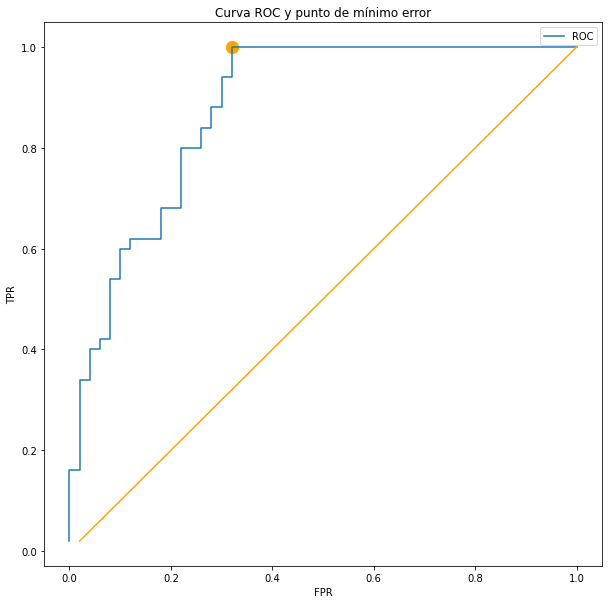

El mínimo error viene dado por un clasificador con un unmbral de: 7.00424629


In [ ]:
#@title Obtengo la curva ROC y el punto de mínimo error

df1 = df.copy()

df1['category'] = (np.concatenate([a_letters, b_letters]) == 'b')
df1 = df1.sort_values('value')
df1 = df1.set_index(pd.Series(range(df1.shape[0])))

b_total = df1.category.sum()
a_total = df1.shape[0] - b_total

df1['b_cumulative'] = df1.category.cumsum()
df1['TPR'] = df1.category.cumsum()/b_total
df1['a_cumulative'] = range(1,1+df1.shape[0]) - df1['b_cumulative']
df1['FPR'] = df1['a_cumulative']/a_total

# para hallar un clasificador con el mínimo error obtengo el punto
# o los puntos más alejados de la diagonal 

TPR = df1[['TPR']].to_numpy()
FPR = df1[['FPR']].to_numpy()
dist = abs((FPR[:] - TPR[:]) / np.sqrt(2))
max_dist_idx = np.argwhere(dist == np.amax(dist))

# grafico la curva ROC y el punto o los puntos obtenidos

df1_array = df1[['FPR', 'TPR']].to_numpy()

ax = df1.plot(x='FPR', y='TPR', figsize=(10,10), label='ROC', title='Curva ROC y punto de mínimo error')
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
plt.plot(df1['TPR'],df1['TPR'], c='orange')
plt.scatter(df1_array[max_dist_idx[:,0],0],df1_array[max_dist_idx[:,0],1], c='orange', s=150)
plt.legend()
plt.show()

print ('El mínimo error viene dado por un clasificador con un unmbral de: ' + np.str(df1.value[max_dist_idx[0,0]]))

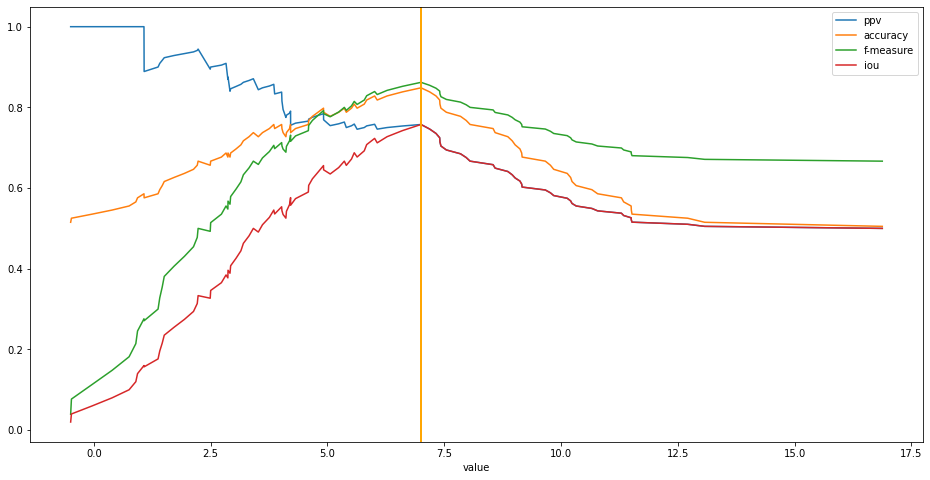

máximo de precisión: -0.49625778, máximo de exactitud: 7.00424629


In [ ]:
#@title Obtengo los parámetros de calidad y sus valoes máximos

df2 = df1.copy()

df2['TP'] = df2['b_cumulative']
df2['FP'] = df2['a_cumulative']
df2['TN'] = a_total - df2['FP']
df2['FN'] = b_total - df2['TP']

df2['ppv'] = df2['TP']/ (df2['TP'] + df2['FP']) # positive predictive value
df2['f-measure'] = 2* df2['ppv'] * df2['TPR'] / (df2['ppv'] + df2['TPR'])
df2['iou'] = df2['TP']/ (df2['TP'] + df2['FP'] + df2['FN'])
df2['accuracy'] = ( df2['TP'] + df2['TN'] ) / (df2.index[-1])

# Hallo los valores máximos para los parámetros

max_ppv = df2['value'][df2["ppv"].idxmax()]
max_accuracy = df2['value'][df2["accuracy"].idxmax()]
max_f_measure = df2['value'][df2["f-measure"].idxmax()]
max_iou = df2['value'][df2["iou"].idxmax()]

df2.plot(x='value', y=['ppv', 'accuracy', 'f-measure', 'iou'], figsize=(16,8))
plt.axvline(x=max_accuracy, c='orange', label='máxima exactitud')
plt.axvline(x=max_f_measure, c='orange', label='máxima f-measure')
plt.axvline(x=max_iou, c='orange', label='máxima IoU')

plt.show()

print('máximo de exactitud: ' + np.str(max_accuracy))

En este caso, la meseta de precisión = 1 en los primeros valores nos indica que con un clasificador que use valores en ese rango no vamos a tener falsos positivos. De nuevo coinciden los máximos de los otros tres parámetros.